<a href="https://colab.research.google.com/github/lucken99/DataScience_Notes/blob/main/Tensorflow_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip list

In [2]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


# The hello world of neural network
### [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.25033&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [3]:

model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
model.fit(xs, ys, epochs=500)

In [6]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 164ms/step
[[18.97527]]


#

# [TF1 Course 1: Lecture Notes](https://community.deeplearning.ai/t/tf1-course-1-lecture-notes/124222)

# Intro to Computer Vision


[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [7]:
mnist = tf.keras.datasets.fashion_mnist

In [41]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Label: 4

 Image pixel array: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0  59  48  43  57   8   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 214 244 219 217 227 219   0   0   2   1   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   6   0   0 118 227 220 224 219 224 223 202   0   0   0   5   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0 158 207 203 224 211 197 224 195 219 196  65   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0  90 182 192 179 210 218 236 251 226 202 213 203 208 161  65   0   0   0   0   0   0]
 [  0   0   0   0   0   0 153 195 178 165 171 208 199 220 232 214 206 190 182 179 190 207 135   0   0   0   0   0]
 [  0   0   0   0   0 147 205  82 112 190 161 166 180 216 223 206 213 203 180 177 179 157 178  81   0   0   0   0]
 [  0   0   0   0   1 185 177  49 126 195 164 175 173 213 209 195 162 187 181 180 184 165 131 210   0   0   0   0]
 [  0   0   0   0  57 205 168 177 198 195 188 18

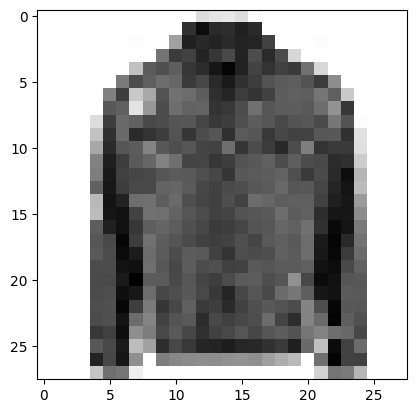

In [42]:
index = 29

# set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f'Label: {train_labels[index]}')
print(f'\n Image pixel array: \n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index], cmap='Greys')


In [53]:
# Normalize the pixel values of the train and text images

train_images = train_images/255.0
test_images = test_images/255.0

In [54]:
# Build the classification model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [55]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0818 - accuracy: 0.6719
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6351 - accuracy: 0.7713
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5613 - accuracy: 0.7989
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5187 - accuracy: 0.8157
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4911 - accuracy: 0.8267
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8352
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4558 - accuracy: 0.8396
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8443
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4344 - accuracy: 0.8469
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.425

In [57]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8378


[0.45875170826911926, 0.8378000259399414]

### Call backs

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [58]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >= 0.90): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
        elif logs.get('loss') < 0.4:
            print("\n Reached 40% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()


In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8473
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4799 - accuracy: 0.8456
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4510 - accuracy: 0.8496
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4626 - accuracy: 0.8475
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4526 - accuracy: 0.8498


# Enhancing Vision with Convolutional Neural Network

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])


In [71]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 128)             

In [72]:
# use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.9455 - accuracy: 0.6524
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6339 - accuracy: 0.7608
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.5647 - accuracy: 0.7871
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.5229 - accuracy: 0.8054
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4933 - accuracy: 0.8170


In [73]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.5023 - accuracy: 0.8194


[0.5022757649421692, 0.8194000124931335]

### Visualizing the convolutions and pooling
[coursera](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb)

In [74]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 18ms/step


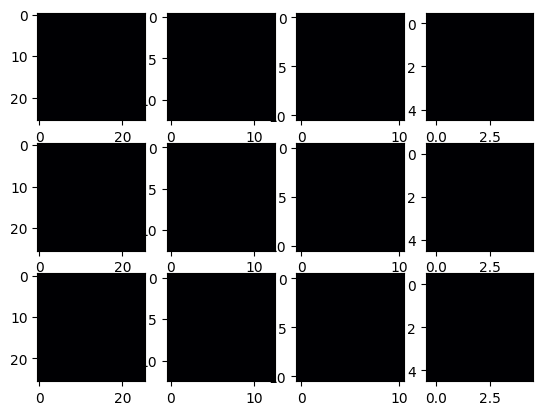

In [75]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)